<a href="https://colab.research.google.com/github/brianisinga/data-analysis-with-python/blob/main/stock%20analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('/content/train.csv')

In [3]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4822 entries, 0 to 4821
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         4822 non-null   int64  
 1   Order ID       4822 non-null   object 
 2   Order Date     4822 non-null   object 
 3   Ship Date      4822 non-null   object 
 4   Ship Mode      4822 non-null   object 
 5   Customer ID    4822 non-null   object 
 6   Customer Name  4822 non-null   object 
 7   Segment        4822 non-null   object 
 8   Country        4822 non-null   object 
 9   City           4822 non-null   object 
 10  State          4822 non-null   object 
 11  Postal Code    4821 non-null   float64
 12  Region         4822 non-null   object 
 13  Product ID     4822 non-null   object 
 14  Category       4822 non-null   object 
 15  Sub-Category   4822 non-null   object 
 16  Product Name   4822 non-null   object 
 17  Sales          4822 non-null   float64
dtypes: float

In [5]:
data.shape

(4822, 18)

In [6]:
data.duplicated().sum()

0

In [7]:
#filling  0 to the empty spaces
data['Postal Code'].fillna(0,inplace=True)
#changing from float to integer
data['Postal Code']=data['Postal Code'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4822 entries, 0 to 4821
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         4822 non-null   int64  
 1   Order ID       4822 non-null   object 
 2   Order Date     4822 non-null   object 
 3   Ship Date      4822 non-null   object 
 4   Ship Mode      4822 non-null   object 
 5   Customer ID    4822 non-null   object 
 6   Customer Name  4822 non-null   object 
 7   Segment        4822 non-null   object 
 8   Country        4822 non-null   object 
 9   City           4822 non-null   object 
 10  State          4822 non-null   object 
 11  Postal Code    4822 non-null   int64  
 12  Region         4822 non-null   object 
 13  Product ID     4822 non-null   object 
 14  Category       4822 non-null   object 
 15  Sub-Category   4822 non-null   object 
 16  Product Name   4822 non-null   object 
 17  Sales          4822 non-null   float64
dtypes: float

In [8]:
data.describe()

,Row ID,Postal Code,Sales
count,4822.000000,4822.000000,4822.000000
mean,2411.500000,54896.480091,229.168572
std,1392.135829,31823.001384,637.194491
min,1.000000,0.000000,0.444000
25%,1206.250000,22304.000000,16.768000
50%,2411.500000,55122.000000,52.596000
75%,3616.750000,90004.000000,212.033500
max,4822.000000,99207.000000,22638.480000


# ***DATA CLEANING***

**checking for duplicates**

In [9]:
if data.duplicated().sum()>0:
  print("There are duplicates")
else:
  print("There are no duplicates")

There are no duplicates


In [10]:
data.duplicated(keep=False).sum()

0

### **EXPLORATORY DATA ANALYSIS**

**CUSTOMER ANALYSIS**

In [11]:
data.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62


In [12]:
#types of customers
types_of_customers= data['Segment'].unique()
print(types_of_customers)

['Consumer' 'Corporate' 'Home Office']


In [13]:
#number of customers in each segment
number_of_customers=data['Segment'].value_counts().reset_index()
#renaming the columns
number_of_customers.columns=['Segment','total sales']
#number_of_customers = number_of_customers.rename(columns={'index': 'Segment', 'Segment': 'Number of Customers'})
number_of_customers

,Segment,total sales
0,Consumer,2571
1,Corporate,1360
2,Home Office,891


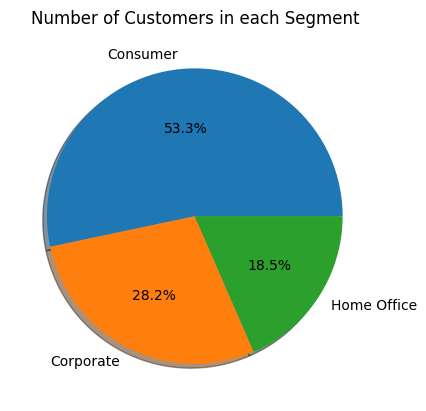

In [14]:
#plotting a pie chart
plt.pie(number_of_customers['total sales'],labels=number_of_customers['Segment'],autopct='%1.1f%%',shadow=True)
plt.title('Number of Customers in each Segment')
plt.show()


# **sales per costomers segment**

In [15]:
sales_per_category= data.groupby("Segment")["Sales"].sum().reset_index()
sales_per_category = sales_per_category.rename(columns={"customer type": "segment", "Total sales": 'sales'})
print(sales_per_category)

       Segment        Sales
0     Consumer  560511.2539
1    Corporate  314387.0533
2  Home Office  230152.5455


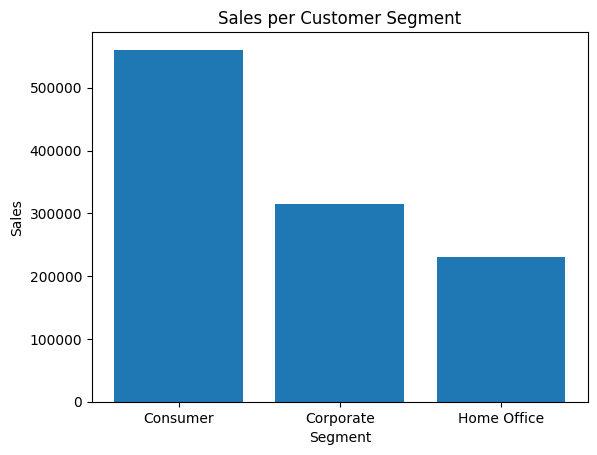

In [16]:
plt.bar(sales_per_category['Segment'],sales_per_category['Sales'])
plt.xlabel('Segment')
plt.ylabel('Sales')
plt.title('Sales per Customer Segment')
plt.show()

**Costomer layalty**

In [17]:
data.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62


In [18]:
customer_order_freq=data.groupby(['Customer ID','Customer Name','Segment'])['Order ID'].count().reset_index()
customer_order_freq.rename(columns={'Order ID': 'Total Orders'}, inplace=True)
repeat_costomers=customer_order_freq[customer_order_freq['Total Orders']>=1]
sorted_repeat_customers=repeat_costomers.sort_values(by="Total Orders",ascending=False)
print(sorted_repeat_customers.head(10).reset_index(drop=True))

  Customer ID     Customer Name      Segment  Total Orders
0    AP-10915    Arthur Prichep     Consumer            23
1    BM-11650        Brian Moss    Corporate            23
2    KL-16645      Ken Lonsdale     Consumer            22
3    JE-15745        Joel Eaton     Consumer            21
4    EP-13915        Emily Phan     Consumer            21
5    ZC-21910  Zuschuss Carroll     Consumer            21
6    PP-18955        Paul Prost  Home Office            21
7    IM-15070      Irene Maddox     Consumer            20
8    SP-20620  Stefania Perrino    Corporate            20
9    SC-20095      Sanjit Chand     Consumer            19


**Ranking Costomers according to sales**

In [19]:
customer_sales=data.groupby(['Customer ID','Customer Name','Segment'])['Sales'].sum().reset_index()